# Защита персональных данных клиентов

В нашем распоряжении данные клиентов страховой компании «Хоть потоп». 

Цель: защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

Задачи:

1. Преобразовать данные, чтобы по ним было сложно восстановить персональную информацию. 
2. Обосновать корректность  работы метода.

## 1. Загрузка данных

In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [19]:
df = pd.read_csv('C:/Users/Lubov/jupyter/ds/insurance.csv')

In [20]:
display(df.head())
display('Кол-во пропусков:', df.isna().sum())
display(df.describe())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


'Кол-во пропусков:'

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [21]:
print('Кол-во дубликатов =', df.duplicated().sum())
print()

Кол-во дубликатов = 153



In [22]:
#удалю дубликаты (это не влияе на дальнейшее исследование, правильнее их оставить или убрать?)
df = df.drop_duplicates()
print('Кол-во дубликатов =', df.duplicated().sum())#проверка
print()

Кол-во дубликатов = 0



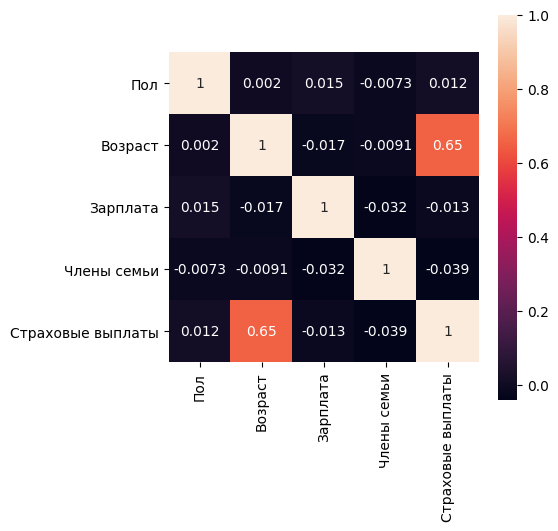

In [23]:
#посмотрю корреляцию
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, square=True);

В основном корреляция слабая, заметная корреляция прослеживается у признаков возраст и страховые выплаты (корр.=0,65), считаю эту зависимость логичной, но так как корреляция не высокая, столбцы признаков удалять не буду.

Рассмотрю распределения некоторых признаков

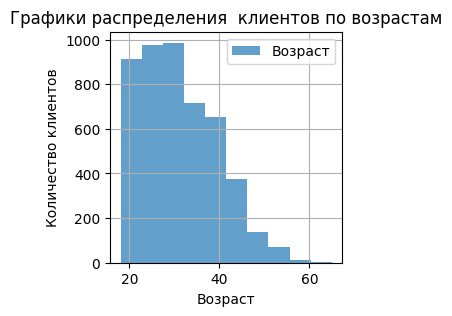

In [24]:
df['Возраст'].plot(kind='hist',figsize=(3,3),grid=True, legend=True, alpha=0.7);
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.title('Графики распределения  клиентов по возрастам')
plt.show()

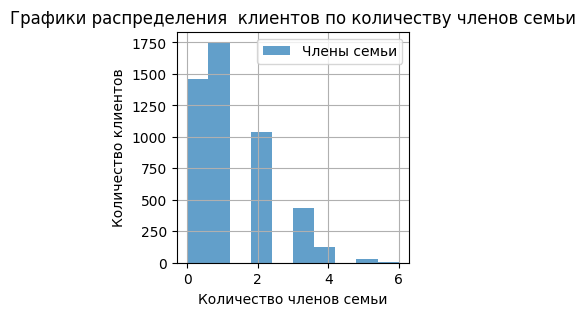

In [25]:
df['Члены семьи'].plot(kind='hist',figsize=(3,3),grid=True, legend=True, alpha=0.7)
plt.xlabel('Количество членов семьи')
plt.ylabel('Количество клиентов')
plt.title('Графики распределения  клиентов по количеству членов семьи')
plt.show()

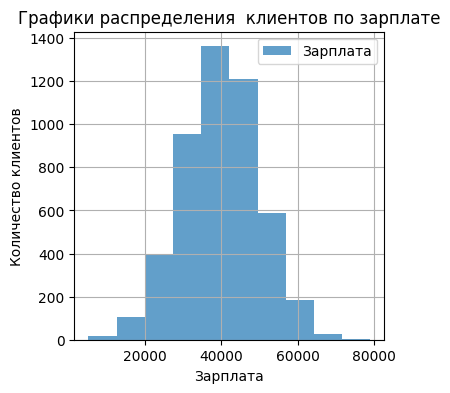

In [26]:
df['Зарплата'].plot(kind='hist',figsize=(4,4),grid=True, legend=True, alpha=0.7)
plt.xlabel('Зарплата')
plt.ylabel('Количество клиентов')
plt.title('Графики распределения  клиентов по зарплате')
plt.show()

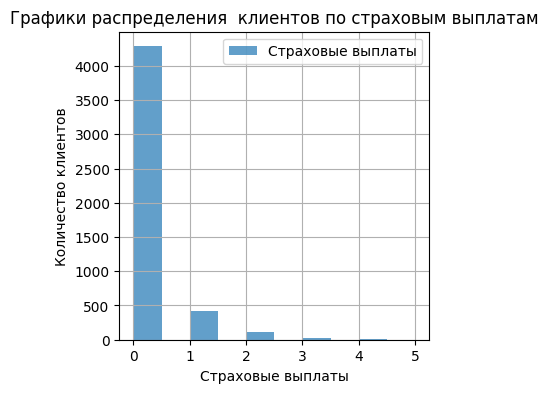

In [27]:
df['Страховые выплаты'].plot(kind='hist',figsize=(4,4),grid=True, legend=True, alpha=0.7)
plt.xlabel('Страховые выплаты')
plt.ylabel('Количество клиентов')
plt.title('Графики распределения  клиентов по страховым выплатам')
plt.show()

### 1.1 Вывод:

Данные рассмотрены, пропуски отсутствуют, дупликаты удалены, дополнительная пердобработка данных не требуется.

## 2. Умножение матриц

**Доказать:** Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу. 


**Дано:**
Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Доказательство:** 
$$
a1 = X*Р*w1
$$
$$
w1 = ((X*Р)^T * X*Р)^{-1} (X*Р)^T*y
$$
$$
a1 = X*Р*((X*Р)^T*X*Р)^{-1} (X*Р)^T*y
$$
$$
a1 = X*Р*(Р^T*Х^T*X*Р)^{-1} (X*Р)^T*y
$$
$$
a1 = X*Р*(Р^T*(Х^T*X)*Р)^{-1} * Р^T*X^T*y
$$
$$
a1 = X*Р*Р^{-1}*(Х^T*X)^{-1}*(Р^T)^{-1}* Р^T*X^T*y
$$
$$
P*P{-1}=E 
$$
$$
(Р^T)^{-1}* Р^T=E
$$
$$
a1 = X*E*(Х^T*X)^{-1}*E*X^T*y
$$
Сокращаем единичную матрицу:
$$
a1 = X*(Х^T*X)^{-1}*X^T*y=Х*w
$$
$$
а=a1 
$$

**Нужно уточнить, что обратная матрица (Р) существует только для квадратных матриц определитель которых не равен нулю.**

## 3. Алгоритм преобразования

Проверю доказательство:

In [28]:
train_features = df.drop('Страховые выплаты', axis=1)
train_target = df['Страховые выплаты']

In [29]:
X = train_features.values
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [30]:
y = train_target.values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
#Создам матрицу (которая может быть обратной)
P = np.round (np.random.normal(3, size=(4, 4)), 2)
P


array([[0.61, 2.15, 3.94, 3.04],
       [4.91, 1.93, 3.57, 3.01],
       [3.37, 4.32, 2.97, 3.04],
       [1.81, 3.41, 3.5 , 2.59]])

In [32]:
np.linalg.inv(P)#проверка обратимости матрицы

array([[-0.27198439,  0.23786786, -0.06381867,  0.1177062 ],
       [-0.28327635, -0.21270565,  0.13483472,  0.42143111],
       [-0.37668722,  0.20097323, -0.91087444,  1.2777058 ],
       [ 1.07207312, -0.15776868,  1.09798686, -1.97764425]])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> На обратимость можно вот еще так проверить: Если определитель квадратной матрицы $P$ не равен нулю, значит у нее есть обратная</div>

<div class="alert alert-info"> Попробую </div>

In [33]:
#проверка обратимости 2
if np.linalg.det(P) == 0:
    print('Матрица необратима')
else:
    print('Матрица обратима')

Матрица обратима


In [34]:
w = np.dot((np.linalg.inv(X.T @ X) @ X.T), y)
a = X @ w
a

array([ 0.28879544,  0.5881911 ,  0.43556558, ..., -0.023962  ,
       -0.0536288 ,  0.08863884])

In [35]:
X1= X @ P
w1 = np.dot((np.linalg.inv(X1.T @ X1) @ X1.T), y)
a1 = X1 @ w1
a1

array([ 0.28879596,  0.58819142,  0.43556582, ..., -0.02396187,
       -0.05362869,  0.08863926])

In [36]:
c = a - a1
c

array([-5.24792460e-07, -3.21279866e-07, -2.43415962e-07, ...,
       -1.38267489e-07, -1.10860405e-07, -4.19798204e-07])

In [38]:
np.allclose(a, a1, atol=1e-04)

True

Разница между предсказаниями и предсказаниями с использованием обратимой матрицы мала - 0,0002

### 3.1 Вывод:

Данный метод может быть применим, так как различие минимально.

## 4. Проверка алгоритма

Создадим модель по исходным формулам для предсказания значений по неизменённым признакам

In [39]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)#добавляю в исходную 
#матрицу train_features столбец из единиц размера матрицы train_features для учета свободного члена.
        y = train_target.values
        w = np.dot((np.linalg.inv(X.T @ X) @ X.T), y) 
        self.w = w[1:]#веса для каждого признака, но без свободного члена
        self.w0 = w[0]#свободный член
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Вычислим результат метрики для исходных признаков

In [40]:
model = LinearRegression()
model.fit(train_features, train_target)
predictions = model.predict(train_features)
r2_score_0 = r2_score(train_target, predictions)
print(r2_score_0)

0.4302010044852068


Создадим модель по исходным формулам для предсказания значений по изменённым признакам

In [41]:
train_features_P = train_features.values @ P# умножу исходную матрицу на квадратную обратимую матрицу, проверка обратимости выполнена выше
train_features_P

array([[167355.73, 214356.69, 147465.81, 150913.04],
       [128287.67, 164252.19, 113027.72, 115661.05],
       [ 70912.39,  90775.97,  62473.53,  63927.29],
       ...,
       [114344.82, 146493.42, 100761.4 , 103121.38],
       [110313.06, 141318.84,  97211.98,  99485.03],
       [136961.9 , 175451.6 , 120689.4 , 123513.91]])

In [42]:
model = LinearRegression()
model.fit(train_features_P, train_target)
predictions = model.predict(train_features_P)
r2_score_P = r2_score(train_target, predictions)
print(r2_score_P)

0.43020100448352605


Сравним R2 изменённой и неизменённой матрицы признаков

In [43]:
tabl = pd.DataFrame(index = ['Исходные признаки', 'Измененные признаки'], columns = ['r2_score'])
tabl.loc['Исходные признаки'] = r2_score_0
tabl.loc['Измененные признаки'] = r2_score_P
tabl

,r2_score
Исходные признаки,0.430201
Измененные признаки,0.430201


### 4.1 Вывод: 

Различие r2_score для исходных признаков и измененных минимально.

## Вывод: 

По условиям задачи требовалось преобразовать исходные данные для того, чтобы они были конфиденциальными, и обосновать корректность метода, также необходимо не ухудшить качество моделей машинного обучения.

В качестве метода преобразования использовался алгоритм, по которому исходнце данные были умножены на обратимую матрицу. В результате метрика R2 значительно не изменилась, что говорит о сохранении качества модели машинного обучения. Цель достигнута.